### Understanding Data

1. Importing important libraries

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [117]:
bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [118]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [119]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Droping unneccessary columns

In [120]:

bike.drop(labels = ['instant', 'dteday', 'casual', 'registered', 'temp'], axis=1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


In [121]:
bike.rename(columns = {'yr': 'year', 'mnth': 'month', 'hum': 'humidity', 'cnt': 'count', 'atemp': 'real_temp'}, inplace = True)
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,real_temp,humidity,windspeed,count
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


To get appropriate dummy variables, redefined categorical columns according to data dictionary 

In [122]:
bike['season'] = bike['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})
bike['month'] = bike['month'].map({1: 'january', 2: 'february', 3: 'march', 4: 'april', 5:'may', 6: 'june', 7: 'july', 8: 'august', 9: 'september', 10: 'october', 11: 'november', 12: 'december'})
bike['weekday'] = bike['weekday'].map({0: 'sunday', 1: 'monday', 2: 'tuesday', 3:  'wednesday', 4: 'thursday', 5: 'friday', 6: 'saturday'})
bike['weathersit'] = bike['weathersit'].map({1: 'clear', 2: 'mist_cloudy', 3: 'light_snow',  4: 'heavy_rain'})
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,real_temp,humidity,windspeed,count
0,spring,0,january,0,saturday,0,mist_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,january,0,sunday,0,mist_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,january,0,monday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,january,0,tuesday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,january,0,wednesday,1,clear,11.46350,43.6957,12.522300,1600


Checking the Categorical columns aabout object datatype


In [123]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   real_temp   730 non-null    float64
 8   humidity    730 non-null    float64
 9   windspeed   730 non-null    float64
 10  count       730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


### Visualising the Data
Heatmap to study correlation of all variables with target variable

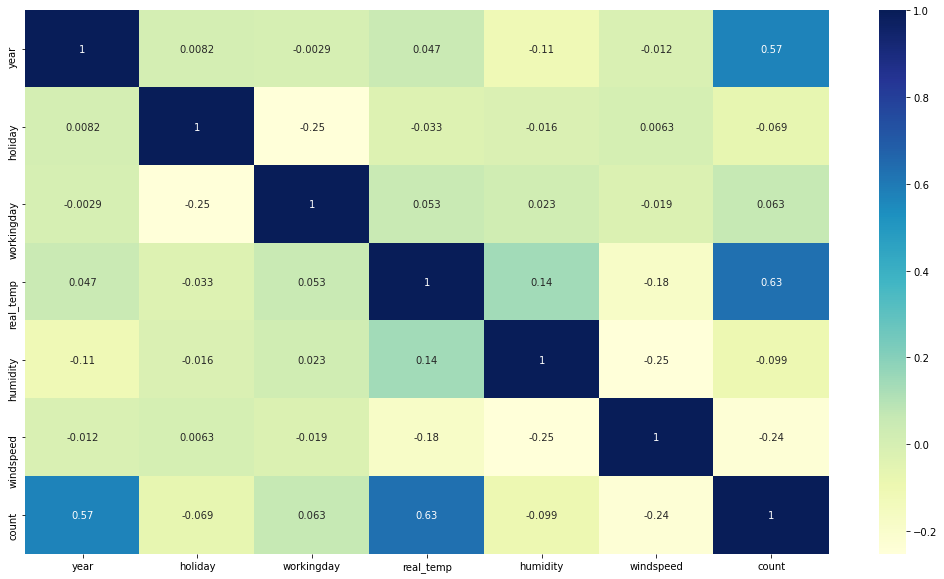

In [124]:
plt.figure(figsize = (18, 10))
sns.heatmap(bike.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Visualising Categorical Variables

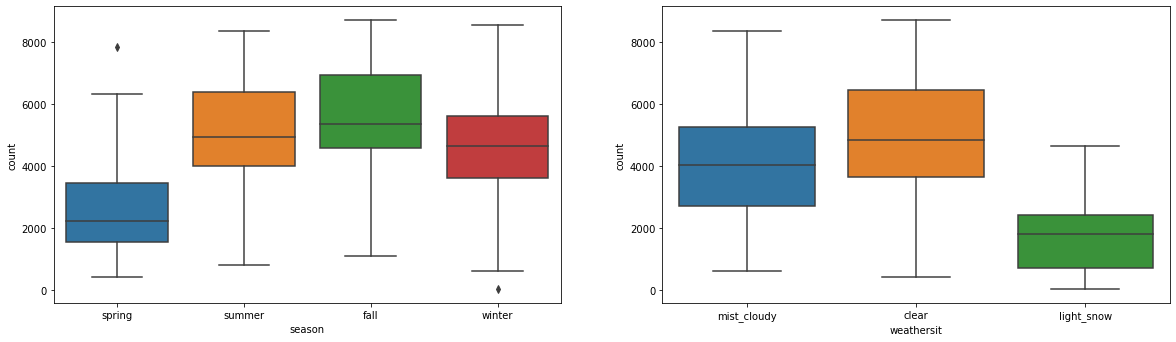

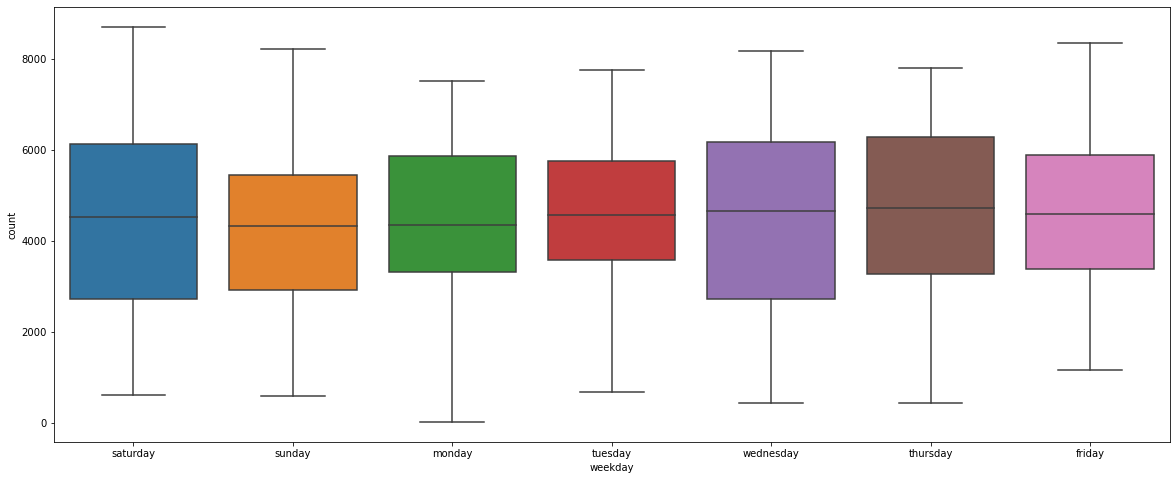

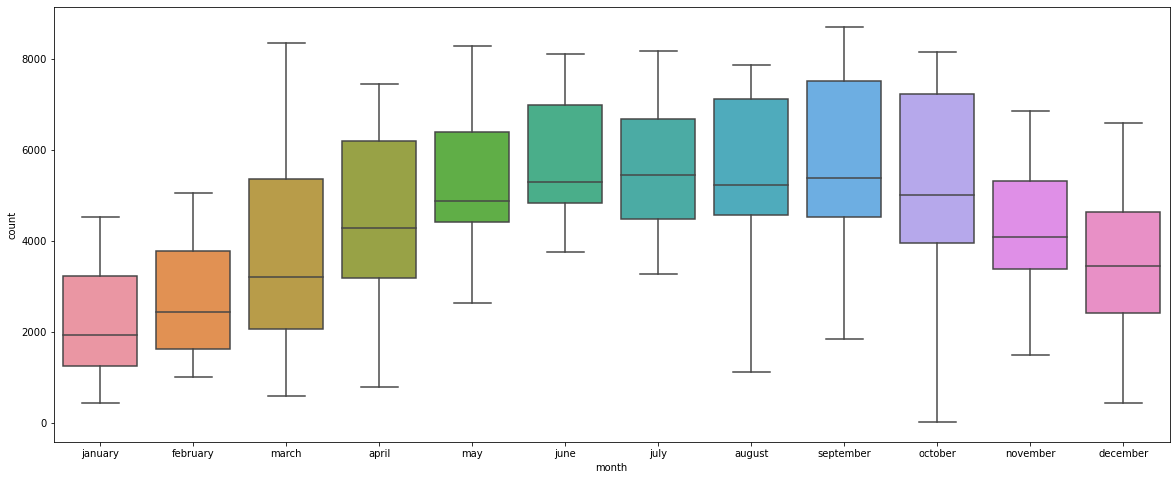

In [125]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'season', y = 'count', data = bike)       # 1. demand vs. season
plt.subplot(2,2,2)
sns.boxplot(x = 'weathersit', y = 'count', data = bike)   # 2. demand vs. weathersit
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'weekday', y = 'count', data = bike)      # 3. demand vs. days of week
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'month', y = 'count', data = bike)        # 4. demand vs. months of year

plt.show()

Insights:
- median counts are highest in 'fall'
- absence of data for 'heavy_snow' showing services not available during this weather
- median counts are highest in 'clear' weather and lowest in 'light_snow'
- median counts are approx. same for all days
- high counts in the months of june to september

### Visualising Numeric Variables

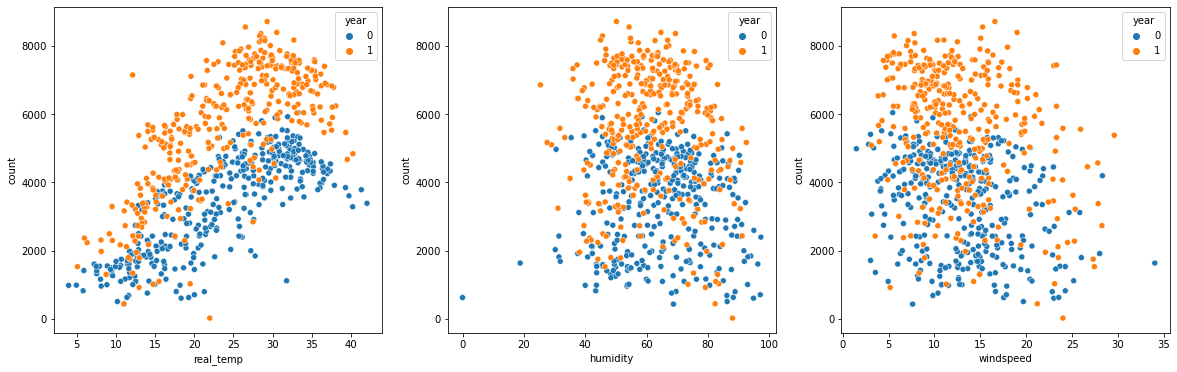

In [126]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.scatterplot(data = bike, y='count', hue='year', x='real_temp')   # 1. demand with temperature
plt.subplot(1,3,2)
sns.scatterplot(data = bike, y='count', hue='year', x='humidity')    # 2. demand with humidity
plt.subplot(1,3,3)
sns.scatterplot(data = bike, y='count', hue='year', x='windspeed')   # 3. demand with windspeed

plt.show()

Insights:
- 'real_temp' has the highest correlation with target

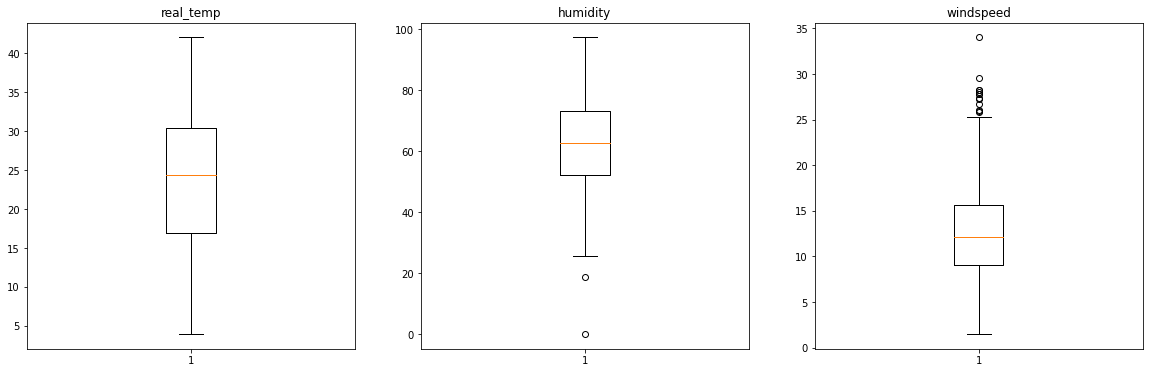

In [127]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
plt.title('real_temp')
plt.boxplot(bike['real_temp'])

plt.subplot(1,3,2)
plt.title('humidity')
plt.boxplot(bike['humidity'])

plt.subplot(1,3,3)
plt.title('windspeed')
plt.boxplot(bike['windspeed'])

plt.show()

Insights:
some outliers in 'humidity' and 'windspeed'

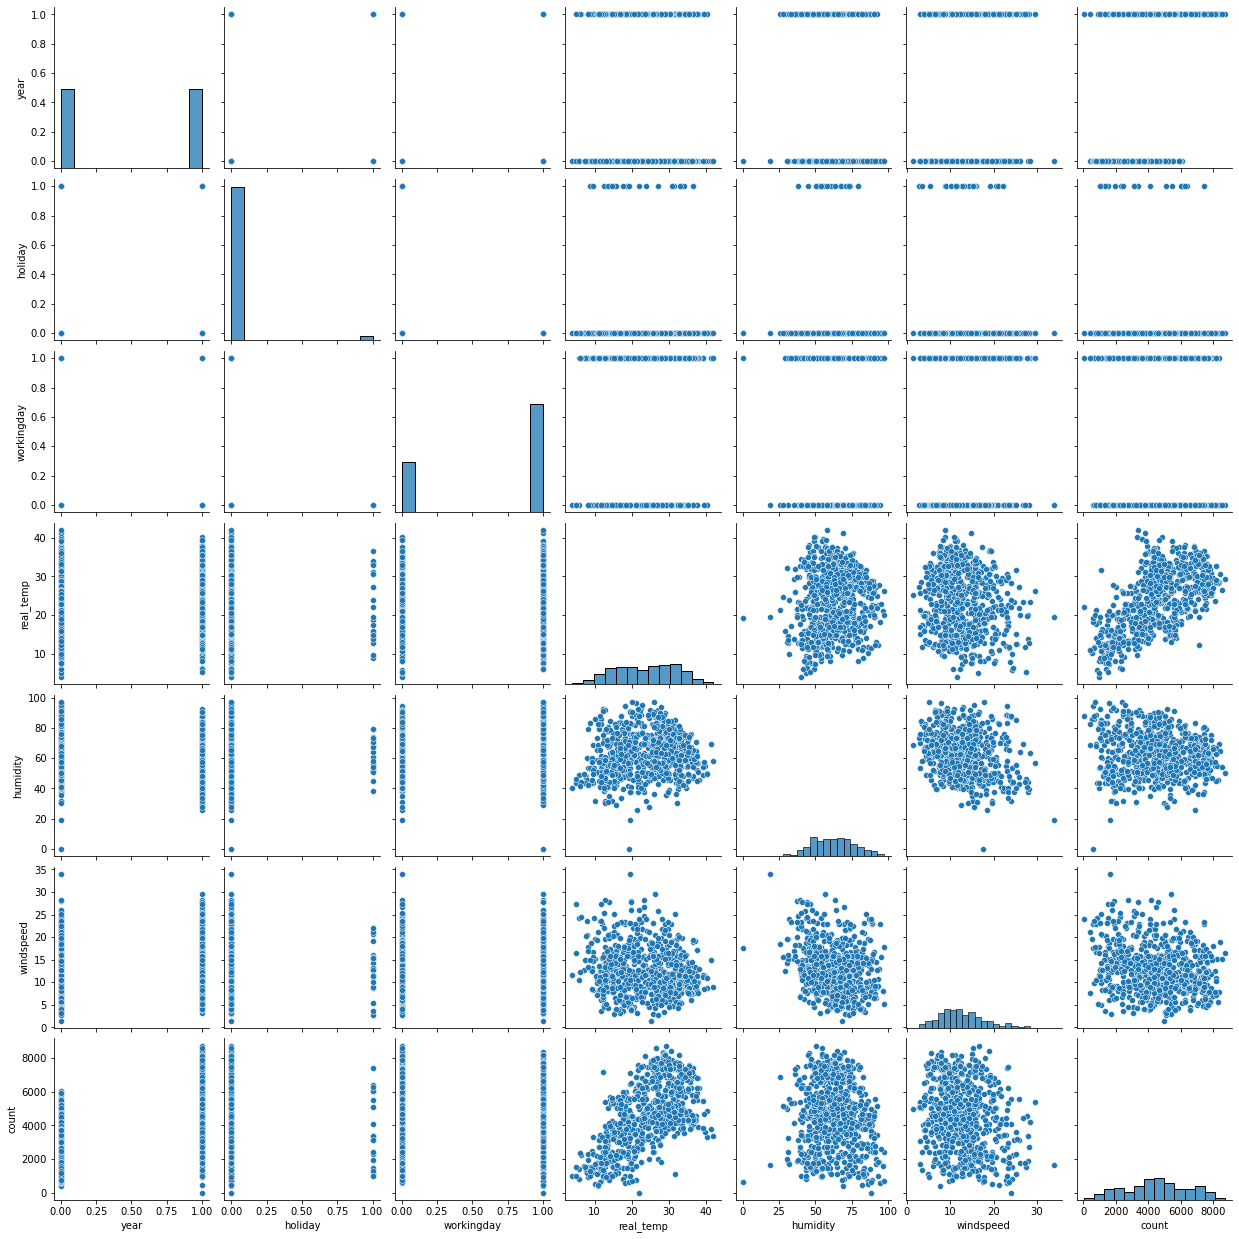

In [128]:
# collective relationship among variables with the target variable using pairplots
sns.pairplot(bike)
plt.show()

### Data Preparation

In [129]:
d1 = pd.get_dummies(bike['season'], drop_first = True)
d2 = pd.get_dummies(bike['month'], drop_first = True)
d3 = pd.get_dummies(bike['weekday'], drop_first = True)
d4 = pd.get_dummies(bike['weathersit'], drop_first = True)

In [130]:
# Months
d1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [131]:
# seasons
d2.head() 

,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [132]:
# weekdays
d3.head() 

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [133]:
#weathersits
d4.head()

,light_snow,mist_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [134]:
#removing the original categorical columns
bike = pd.concat([bike, d1, d2, d3, d4], axis = 1)
remcol = ['season', 'month', 'weekday', 'weathersit']
bike.drop(bike[remcol], axis = 1, inplace=True)
bike.head()

,year,holiday,workingday,real_temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [135]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         730 non-null    int64  
 1   holiday      730 non-null    int64  
 2   workingday   730 non-null    int64  
 3   real_temp    730 non-null    float64
 4   humidity     730 non-null    float64
 5   windspeed    730 non-null    float64
 6   count        730 non-null    int64  
 7   spring       730 non-null    uint8  
 8   summer       730 non-null    uint8  
 9   winter       730 non-null    uint8  
 10  august       730 non-null    uint8  
 11  december     730 non-null    uint8  
 12  february     730 non-null    uint8  
 13  january      730 non-null    uint8  
 14  july         730 non-null    uint8  
 15  june         730 non-null    uint8  
 16  march        730 non-null    uint8  
 17  may          730 non-null    uint8  
 18  november     730 non-null    uint8  
 19  october 

### Splitting the Data into Training and Testing Sets

In [136]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

- Rescaling the Features ( Going to use MinMax)

In [137]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [138]:
concol = ['real_temp', 'humidity', 'windspeed']
bike_train[concol] = scaler.fit_transform(bike_train[concol])
bike_train.head()

,year,holiday,workingday,real_temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
653,1,0,1,0.501133,0.575354,0.300794,7534,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.766351,0.725633,0.264686,7216,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,1796,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [139]:
bike_train.describe()

,year,holiday,workingday,real_temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X and Y sets for the model building

In [140]:
y_train = bike_train.pop('count')
X_train = bike_train

### Building a linear model

- RFE ( Recursive Feature Elimination)

In [141]:
# top 15 variables to be selected

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe =  RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [142]:
# Chekcing Ranks 
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('real_temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 5),
 ('winter', True, 1),
 ('august', False, 6),
 ('december', True, 1),
 ('february', False, 3),
 ('january', True, 1),
 ('july', True, 1),
 ('june', False, 7),
 ('march', False, 14),
 ('may', False, 4),
 ('november', True, 1),
 ('october', False, 12),
 ('september', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 13),
 ('light_snow', True, 1),
 ('mist_cloudy', True, 1)]

In [143]:
rfecol = X_train.columns[rfe.support_]
rfecol

Index(['year', 'holiday', 'real_temp', 'humidity', 'windspeed', 'spring',
       'winter', 'december', 'january', 'july', 'november', 'september',
       'saturday', 'light_snow', 'mist_cloudy'],
      dtype='object')

In [144]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'august', 'february', 'june', 'march', 'may',
       'october', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

- Building model using statsmodel, for the detailed statistics

In [145]:
X_train_rfe = X_train[rfecol]
X_train_rfe.head()

,year,holiday,real_temp,humidity,windspeed,spring,winter,december,january,july,november,september,saturday,light_snow,mist_cloudy
653,1,0,0.501133,0.575354,0.300794,0,1,0,0,0,0,0,0,0,0
576,1,0,0.766351,0.725633,0.264686,0,0,0,0,1,0,0,0,0,0
426,1,0,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,1,0,1
728,1,0,0.200348,0.498067,0.663106,1,0,1,0,0,0,0,0,0,0
482,1,0,0.391735,0.504508,0.188475,0,0,0,0,0,0,0,1,0,1


In [146]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_rfe)   
lr = sm.OLS(y_train, X_train_lm).fit()     
print(lr.summary())                         

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          9.67e-187
Time:                        23:14:27   Log-Likelihood:                -4116.9
No. Observations:                 510   AIC:                             8266.
Df Residuals:                     494   BIC:                             8334.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3204.7688    278.590     11.504      

## VIF
- Verifing for all variables in the model to study the multicollinearity in the model

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,humidity,25.08
2,real_temp,16.88
4,windspeed,4.03
6,winter,2.93
5,spring,2.89
14,mist_cloudy,2.26
0,year,2.06
10,november,1.82
8,january,1.75
7,december,1.54


Insights:
- variables with high p-values (>= 0.05) and high VIFs (>5) to be removed

In [148]:
X = X.drop('saturday', 1)

X_train_lm = sm.add_constant(X)
lr_1 = sm.OLS(y_train, X_train_lm).fit()

print(lr_1.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          2.58e-187
Time:                        23:14:27   Log-Likelihood:                -4118.3
No. Observations:                 510   AIC:                             8267.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3241.9087    278.114     11.657      

#### Dropping the variable update the model

In [149]:
 
X = X.drop('humidity', 1)

X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()

print(lr_2.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          3.95e-185
Time:                        23:14:27   Log-Likelihood:                -4126.3
No. Observations:                 510   AIC:                             8281.
Df Residuals:                     496   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2569.6203    223.560     11.494      

In [150]:
X = X.drop('november', 1)

X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

print(lr_3.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          8.41e-185
Time:                        23:14:27   Log-Likelihood:                -4129.8
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     497   BIC:                             8341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2457.9739    220.836     11.130      

In [151]:
X = X.drop('december', 1)

X_train_lm = sm.add_constant(X)
lr_4 = sm.OLS(y_train, X_train_lm).fit()

print(lr_4.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.4
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          5.75e-185
Time:                        23:14:27   Log-Likelihood:                -4132.2
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     498   BIC:                             8339.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2356.1727    216.638     10.876      

In [152]:
X = X.drop('january', 1)

X_train_lm = sm.add_constant(X)
lr_5 = sm.OLS(y_train, X_train_lm).fit()

print(lr_5.summary())
print('\n'*2)
print('VIF Check')

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
print(vif)

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.0
Date:                Sat, 11 Dec 2021   Prob (F-statistic):          5.68e-185
Time:                        23:14:27   Log-Likelihood:                -4135.1
No. Observations:                 510   AIC:                             8292.
Df Residuals:                     499   BIC:                             8339.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2232.8353    211.209     10.572      

In [154]:
lr_5.params

const          2232.835273
year           2043.571645
holiday        -826.484887
real_temp      4034.912310
windspeed     -1092.018884
spring        -1020.561779
winter          338.691695
july           -590.994742
september       521.978849
light_snow    -2450.461573
mist_cloudy    -710.158488
dtype: float64

#### Residual Analysis of the train data

In [155]:
y_train_count = lr_5.predict(X_train_lm)

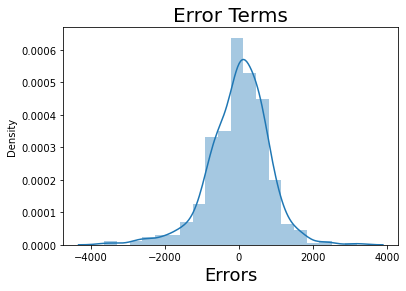

In [156]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
plt.title('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  
plt.show()

### Making Predictions

In [157]:
concol = ['real_temp', 'humidity','windspeed']
bike_test[concol] = scaler.transform(bike_test[concol])
bike_test.head()

,year,holiday,workingday,real_temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
184,0,1,0,0.769660,0.657364,0.084219,6043,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.842587,0.610133,0.153728,6211,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.496145,0.837699,0.334206,2659,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,4780,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.741471,0.314298,0.537414,4968,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [158]:
bike_test.describe()

,year,holiday,workingday,real_temp,humidity,windspeed,count,spring,summer,winter,...,october,september,monday,saturday,sunday,thursday,tuesday,wednesday,light_snow,mist_cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457,0.027397,0.319635
std,0.500722,0.188034,0.459904,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


####  Dividing into X_test and y_test

In [159]:
y_test = bike_test.pop('count')
X_test = bike_test

In [160]:
X_test_lm = sm.add_constant(X_test)
X_test_lm = X_test_lm.drop(['january', 'december','november', "humidity", "saturday", 'workingday', 'summer', 'august', 'february', 'june', 'march', 'may',
       'october', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'], axis = 1)

In [161]:
X_test_lm.head()

,const,year,holiday,real_temp,windspeed,spring,winter,july,september,light_snow,mist_cloudy
184,1.0,0,1,0.769660,0.084219,0,0,1,0,0,1
535,1.0,1,0,0.842587,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.496145,0.334206,0,1,0,0,0,1
221,1.0,0,0,0.795343,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.741471,0.537414,0,0,0,0,0,0


In [162]:
y_pred_lm = lr_5.predict(X_test_lm)

#### Model Evaluation

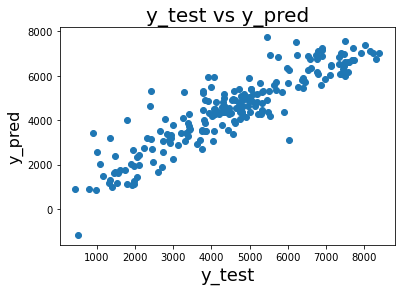

In [163]:
fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
plt.title('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)          # X-label
plt.ylabel('y_pred', fontsize = 16)          # Y-label
plt.show()

In [164]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [165]:
np.sqrt(mean_squared_error(y_test, y_pred_lm))

827.8900235864853

In [166]:
np.sqrt(mean_squared_error(y_test, y_pred_lm))

827.8900235864853